In [9]:
from chemicals import CAS_from_any, Tb
import chemicals.critical as ct
import chemicals.phase_change
import chemicals.data_reader as cd

In [10]:
sub = CAS_from_any("HCN")

In [11]:
Tb(sub, method="CRC_ORG")

298.78

In [12]:
ct.Tb_Tc_relationship(Tc=ct.Tc(sub))

278.6585365853659

In [13]:

cd.CONSTANT_DATABASE_NAME_TO_IDX

{'index': 0,
 'MW': 1,
 'Tt': 2,
 'Tm': 3,
 'Tb': 4,
 'Tc': 5,
 'Pt': 6,
 'Pc': 7,
 'Vc': 8,
 'Zc': 9,
 'omega': 10,
 'T_flash': 11,
 'T_autoignition': 12,
 'LFL': 13,
 'UFL': 14,
 'Hfs': 15,
 'Hfl': 16,
 'Hfg': 17,
 'S0s': 18,
 'S0l': 19,
 'S0g': 20,
 'Hfus': 21,
 'Stockmayer': 22,
 'molecular_diameter': 23,
 'dipole_moment': 24,
 'logP': 25,
 'RG': 26,
 'RON': 27,
 'MON': 28,
 'ignition_delay': 29,
 'linear': 30,
 'GWP': 31,
 'ODP': 32,
 'RI': 33,
 'RIT': 34}

In [14]:
chemicals.phase_change.Tb_all_methods

('HEOS',
 'CRC_INORG',
 'CRC_ORG',
 'COMMON_CHEMISTRY',
 'WEBBOOK',
 'YAWS',
 'WIKIDATA',
 'JOBACK')

In [18]:
chemicals.phase_change.Hvap_data_CRC

,Chemical,Formula,Tb,HvapTb,Hvap298
CAS,,,,,
100-41-4,Ethylbenzene,C8H10,409.31,35570.0,42240.0
100-42-5,Styrene,C8H8,418.15,38700.0,NaN
100-46-9,Benzylamine,C7H9N,458.15,NaN,60160.0
100-47-0,Benzonitrile,C7H5N,464.25,45900.0,NaN
100-51-6,Benzyl alcohol,C7H8O,478.46,50480.0,NaN
...,...,...,...,...,...
98-08-8,(Trifluoromethyl)benzene,C7H5F3,375.25,32630.0,37600.0
98-82-8,Isopropylbenzene,C9H12,425.56,NaN,45130.0
98-86-2,Acetophenone,C8H8O,475.15,43980.0,55400.0


In [20]:
from IPython.display import IFrame
IFrame('https://www.chemeo.com/stats', width=700, height=350)

In [7]:
from chemicals import miscdata
import chemicals.phase_change
CRC_ORG = 'CRC_ORG'
CRC_INORG = 'CRC_INORG'
YAWS = 'YAWS'
OPEN_NTBKM = 'OPEN_NTBKM'
CRC = 'CRC'

Tb_sources = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data
    }
cd.retrieve_from_df_dict(Tb_sources, sub, 'Tb', method=CRC_ORG)

298.78

In [8]:
df=Tb_sources["WIKIDATA"]
#df.columns
df2=df[['Name', 'Tb']]
df3 = df2.dropna()
#["Tb"]]
df3

KeyError: 'WIKIDATA'

In [ ]:
df3["Name"]

In [ ]:
import numpy as np
import pandas as pd
import pubchempy as pcp

In [ ]:
from chemicals.data_reader import (
    data_source,
    database_constant_lookup,
    list_available_methods_from_df_dict,
    register_df_source,
    retrieve_any_from_df_dict,
    retrieve_from_df_dict,
)
Tb_data_Yaws = data_source('Yaws Boiling Points.tsv')

Tb_sources_new = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data,
        miscdata.COMMON_CHEMISTRY: miscdata.common_chemistry_data,
        miscdata.WEBBOOK: miscdata.webbook_data,
        YAWS: Tb_data_Yaws,
        miscdata.WIKIDATA: miscdata.wikidata_data,
        miscdata.JOBACK: miscdata.joback_predictions,
    }

In [ ]:
df_new=Tb_sources_new
cas_arr = []
df1 = []
for dict_df in df_new:
    print(dict_df, "  ", len(Tb_sources_new[dict_df]["Tb"].dropna()))
    df2 = Tb_sources_new[dict_df].index.to_numpy()
    df2 = list(set(df1) | set(df2))
    df1 = Tb_sources_new[dict_df].index.to_numpy()

In [ ]:
df_new=Tb_sources_new
cas_arr = []
list1 = list()
for dict_df in df_new:
    table = Tb_sources_new[dict_df]
    table["CAS"]=table.index
    #TABLE = table["Tb"].dropna()
    #print(table)
    #temp_DF = pd.concat([df1,table])
    list1.append(table)
CAS_search = Tb_sources_new["WIKIDATA"]["CAS"]

In [ ]:
table["CAS"]=table.index
table

In [ ]:
# create a excel writer object
text_sheet = "Source_"
i=1
with pd.ExcelWriter("TB_DB_CHEMICAL.xlsx") as writer:
    for list in list1 :
        temp_text_sheet = text_sheet+str(i)
        #print(list)
        #print("")
        #print("")
        
        # use to_excel function and specify the sheet_name and index 
        # to store the dataframe in specified sheet
        list.to_excel(writer, sheet_name=temp_text_sheet, index=False)
        i=i+1

In [ ]:
chemicals.phase_change.Tb_all_methods
len(df2)

In [ ]:
List1=list()
List2=list()
names = df3["Name"]
i=0
for name1 in names:
    print(i, "  ",name1)
    results = pcp.get_compounds(name1, 'name')
    if results == []:
        List1.append('None')
        List2.append('None')
    else:
        print(results[0].isomeric_smiles, " ", results[0].molecular_formula)
        List1.append(results[0].isomeric_smiles)
        List2.append(results[0].molecular_formula )
    i=i+1
    print("")
    
data = {
    "Name":names,
    "SMILES":List1,
    "Formula":List2
    }

tdf = pd.DataFrame(data)

tdf.to_csv("SMILES_3.csv")

In [1]:
import numpy as np
import pandas as pd
import pubchempy as pcp


def remove_outliers(Excel_path, Excel_sheetname, Threshold=3):
    df = pd.read_excel(Excel_path, sheet_name=Excel_sheetname)
    data = df['Tb']
    outliers = []
    threshold=Threshold
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    new_df = df[~df['Tb'].isin(outliers)]
    print(outliers)
    return new_df
df = remove_outliers("Data.xlsx", "Load_AllDataSetC12")

[1025.15, 4098.15, 4273.15, 4473.15, 4473.15, 1149.94, 1020.98, 888.92, 892.02, 895.25, 934.61, 944.4, 963.92, 1088.82, 1245.87, 1271.54, 1359.98, 1263.42, 1369.98, 1382.86, 878.93, 883.7, 886.16, 888.2, 888.2, 888.2, 888.2, 898.01, 903.66, 905.58, 921.88, 941.53, 941.53, 947.86, 960.99, 987.95, 994.86, 994.86, 1003.02, 1013.62, 1102.06, 1288.16, 1299.68, 1464.99, 1887.63, 875.4, 875.4, 875.44, 879.77, 879.77, 913.18, 964.95, 1005.5, 1056.15, 1056.15, 1783.45, 877.41, 877.44, 881.18, 881.74, 883.22, 883.22, 912.8, 930.77, 956.84, 959.06, 959.06, 986.22, 988.66, 991.92, 992.9, 1006.21, 1013.97, 1027.94, 1040.5, 1824.9, 904.06, 912.18, 912.8, 918.56, 926.02, 926.86, 967.45, 988.83, 1067.91, 2301.13, 894.67, 926.61, 926.61, 946.21, 981.99, 997.44, 1035.32, 1040.62, 1048.72, 1062.6, 1097.19, 1104.59, 1109.9, 1124.5, 1135.84, 903.8, 907.59, 1041.51, 1046.25, 1052.61, 1109.19, 1141.94, 1149.94, 1179.27, 1193.58, 1193.9, 1359.34, 879.0, 879.98, 890.69, 893.12, 894.8, 906.96, 912.36, 919.74, 9

In [2]:
df

,Name,SMILES,Tb,C
0,methane,C,111.65,1
1,ethane,CC,184.55,2
2,propane,CCC,231.05,3
3,Cyclopropane,C1CC1,240.35,3
4,2-Methylpropane,CC(C)C,261.45,4
...,...,...,...,...
14446,"1,5-dimethyl-5-(3-oxocyclohexen-1-yl)-1,3-diaz...",CC1(C(=O)NC(=O)N(C1=O)C)C2=CC(=O)CCC2,850.31,12
14447,1-[2-[2-[2-(2-hydroxypropylamino)ethylamino]et...,CC(CNCCNCCNCCNCC(C)O)O,858.32,12
14448,"(1R)-1-[(3aR,5R,6S,6aR)-6-hydroxyspiro[3a,5,6,...",C1CCC2(CC1)O[C@@H]3[C@H]([C@H](O[C@@H]3O2)[C@@...,859.31,12
14449,"bis[2-(4,5-dihydro-1H-imidazol-2-yl)propan-2-y...",CC(C)(C1=NCCN1)N=NC(C)(C)C2=NCCN2,869.58,12


<Axes: xlabel='Tb'>

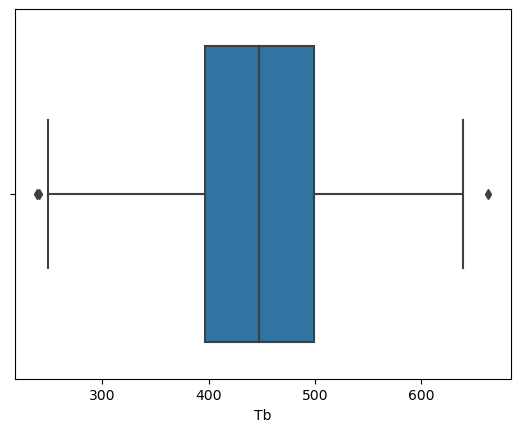

In [3]:
import seaborn as sns
sns.boxplot(x=df['Tb'])

<Axes: xlabel='Tb'>

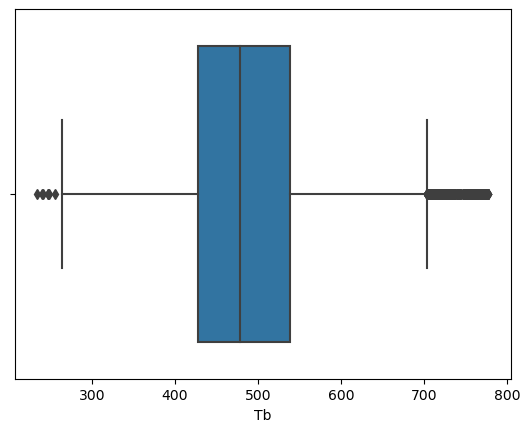

In [5]:
import seaborn as sns
sns.boxplot(x=df2['Tb'])

In [3]:
df2 = remove_outliers("Data.xlsx", "Load_CHON_8DB", 2)

[112.15, 190.15, 4098.15, 4273.15, 4473.15, 4473.15, 189.00035, 789.83, 799.73, 1149.94, 217.15, 1020.98, 787.24, 789.33, 795.83, 801.24, 801.63, 845.49, 869.81, 888.92, 892.02, 895.25, 934.61, 944.4, 963.92, 1088.82, 1245.87, 1271.54, 1359.98, 781.15, 788.27, 1263.42, 1369.98, 1382.86, 779.24, 779.24, 784.92, 785.85, 785.94, 792.34, 798.65, 804.03, 805.28, 805.87, 806.58, 814.11, 815.78, 825.6, 825.6, 825.6, 825.6, 830.51, 830.51, 842.44, 844.68, 844.68, 844.68, 844.68, 845.06, 847.39, 850.33, 850.33, 864.71, 868.55, 878.93, 883.7, 886.16, 888.2, 888.2, 888.2, 888.2, 898.01, 903.66, 905.58, 921.88, 941.53, 941.53, 947.86, 960.99, 987.95, 994.86, 994.86, 1003.02, 1013.62, 1102.06, 1288.16, 1299.68, 1464.99, 1887.63, 778.68, 778.72, 778.72, 778.72, 778.72, 778.72, 785.44, 785.44, 785.44, 794.96, 795.85, 825.55, 826.91, 827.96, 832.14, 839.25, 839.25, 839.28, 839.28, 841.17, 867.02, 869.07, 875.4, 875.4, 875.44, 879.77, 879.77, 913.18, 964.95, 1005.5, 1056.15, 1056.15, 1783.45, 783.78, 7

In [4]:
df2

,CAS,NAME,SMILES,C String,Tb,C Atom
2,14168-44-6,N-(nitramidomethyl)nitramide,C(N[N+](=O)[O-])N[N+](=O)[O-],C,264.15,1
3,865-40-7,nitrosomethane,CN=O,C,285.88,1
4,157-26-6,dioxirane,C1OO1,C,287.79,1
5,2053-29-4,methanimine,C=N,C,299.46,1
6,661-20-1,isocyanate,C(=[N-])=O,C,313.36,1
...,...,...,...,...,...,...
11045,78-18-2,1-(1-hydroperoxycyclohexyl)peroxycyclohexan-1-ol,C1CCC(CC1)(O)OOC2(CCCCC2)OO,CCCCCCCCCCCC,765.36,12
11046,6402-36-4,(E)-dodec-2-enedioic acid,C(CCCCC(=O)O)CCC/C=C/C(=O)O,CCCCCCCCCCCC,769.34,12
11047,62563-15-9,"dibutyl (2S,3S)-2,3-dihydroxybutanedioate",CCCCOC(=O)[C@H]([C@@H](C(=O)OCCCC)O)O,CCCCCCCCCCCC,774.08,12
11048,66280-55-5,dodecanediperoxoic acid,C(CCCCCC(=O)OO)CCCCC(=O)OO,CCCCCCCCCCCC,774.96,12


In [29]:
min(np.array(df2[["Tb"]]))

array([234.16])

In [6]:
pcp.get_compounds("50-00-0","name")

[Compound(712)]

In [ ]:
List1=list()
List2=list()
names = df3["Name"]
i=0
CAS_search
for name1 in CAS_search:
    print(i, "  ",name1)
    results = pcp.get_compounds(name1, 'name')
    if results == []:
        List1.append('None')
        List2.append('None')
    else:
        print(results[0].isomeric_smiles, " ", results[0].molecular_formula)
        List1.append(results[0].isomeric_smiles)
        List2.append(results[0].molecular_formula )
    i=i+1
    print("")
    
data = {
    "Name":names,
    "SMILES":List1,
    "Formula":List2
    }

tdf = pd.DataFrame(data)

tdf.to_csv("SMILES_3.csv")

In [ ]:
import numpy as np
import pandas as pd
import pubchempy as pcp

from chemicals.data_reader import (
    data_source,
    database_constant_lookup,
    list_available_methods_from_df_dict,
    register_df_source,
    retrieve_any_from_df_dict,
    retrieve_from_df_dict,
)
import chemicals.phase_change
Tb_data_Yaws = data_source('Yaws Boiling Points.tsv')

Tb_sources_new = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data,
        miscdata.COMMON_CHEMISTRY: miscdata.common_chemistry_data,
        miscdata.WEBBOOK: miscdata.webbook_data,
        YAWS: Tb_data_Yaws,
        miscdata.WIKIDATA: miscdata.wikidata_data,
        miscdata.JOBACK: miscdata.joback_predictions,
    }

CRC_ORG = 'CRC_ORG'
CRC_INORG = 'CRC_INORG'
YAWS = 'YAWS'
OPEN_NTBKM = 'OPEN_NTBKM'
CRC = 'CRC'


df_new=Tb_sources_new
cas_arr = []
df1 = []
for dict_df in df_new:
    
    print(Tb_sources_new[dict_df])
          #[["Tb"]])
        
        


In [ ]:
#Tb_sources_new["WEBBOOK"][["Tm","Tb"]].dropna()
Tb_sources_new["JOBACK"]

In [ ]:
for dict_df in df_new:
    print(dict_df)

In [ ]:
"""
HEOS                  K
CRC_ORG               K
CRC_INORG             K
COMMON_CHEMISTRY      K
WEBBOOK               K  (strange)
YAWS                  K
WIKIDATA              K
JOBACK                K


"""